In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [113]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Import the Dataset 

 #### Training data

In [114]:
housePricesData = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
housePricesData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Testing data

In [115]:
housePricesDataTest = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

#### *Dropping the 'id' column as it gives no information*

In [116]:
housePricesData.drop(columns=["Id"],inplace=True)

#### We will now analyze the objects types in the columns, and subsequently remove non-numerical columns.

In [117]:
print(housePricesData.dtypes.to_string())

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


#### Using this function we can select columns that only contain floats and ints.

In [118]:
# select the float & int64 columns
df_num = housePricesData.select_dtypes(include=[np.float, np.int64])

#### Checking for values that are Null or NA.


In [119]:
print(df_num.isnull().sum().to_string())

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0


#### Removing NaN values by using the fillNA function with the median value of the column.

In [120]:
df_num['LotFrontage'].fillna(df_num['LotFrontage'].median(), inplace=True)
df_num['GarageYrBlt'].fillna(df_num['GarageYrBlt'].median(), inplace=True)
df_num['MasVnrArea'].fillna(df_num['MasVnrArea'].median(), inplace=True)
#df_num['Tonnage'].fillna(df_num['Tonnage'].median(), inplace=True)
print(df_num.isnull().sum().to_string())

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


#### A subsequent inspection of the dataframe ensures all of the NaN values have been eliminated.

In [121]:
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


# Create 5 New Features using Engineering Judgement

 - HVAC Square Footage
 - Tonnage
 - Sale Condition Ratio
 - Manually One Hot Encode based on the Sale Condition
 - Vehicle Ratio

In [122]:
HVAC_square_footage = ['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea']

"""This feature was created to determine the total square footage needed for Heating Ventatilation and Cooling equipment.
This will become exptionally usefull when determining the BTU and tonnage needed for equipements. This can tie 
into the operational cost of the residential area, thus effecting the sales price.
"""
df_num['HVACSquareFootage'] = df_num[HVAC_square_footage[0]] + df_num[HVAC_square_footage[1]] + df_num[HVAC_square_footage[2]] + df_num[HVAC_square_footage[3]]

def TonnageCalculator(totSquareFootage):
    """
    This is a calcualtor that determines the typical tonnage by square foot in residential areas.
    The Reference Link: https://kobiecomplete.com/cool-tips/btu-calculator/
    This will be usefull to detemine the amount of energy the residential propery is consuming, which may have 
    an impact on the sale price of the property due to operational costs of the buiding.
    """
    if 750 <= totSquareFootage <= 1000:
        return 2
    
    if 1050 <= totSquareFootage <= 1400:
        return 2.5
    
    if 1450 <= totSquareFootage <=1700:
        return 3
    
    if 1750 <= totSquareFootage <= 1900:
        return 3.5
    
    if 1950 <= totSquareFootage <=2200:
        return 4
    
    if totSquareFootage >= 2250:
        return 5  
    
# 2nd feature has been created which tells us what the amount of energy the property is going to be using.
df_num['Tonnage'] = df_num['HVACSquareFootage'].apply(TonnageCalculator)
df_num['Tonnage'].fillna(df_num['Tonnage'].median(), inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [123]:
""" These features were created to determine the effect of Condition on the residential property: 
1.) First we obtain the Sale Condition Ratio relative to the mean of all of the sales price. 
2.) Next we translate the individual sale conditions into their own respective columns."""

df_num['SaleCondition'] = housePricesData['SaleCondition'].fillna(housePricesData['SaleCondition'].mode())
saleCondition = df_num.SaleCondition.unique().tolist()

def Sale_Condition_Ratio(s):
    
    mean = df_num['SalePrice'].mean()
    val = s / mean
    
    return val


def Normal_Column_Creation(s):
    
    if s['SaleCondition'] == 'Normal':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)
    
def Abnorml_Column_Creation(s):
    
    if s['SaleCondition'] == 'Abnorml':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)
    
def Partial_Column_Creation(s):
    
    if s['SaleCondition'] == 'Partial':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)
    
def AdjLand_Column_Creation(s):
    
    if s['SaleCondition'] == 'AdjLand':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)
    
def Alloca_Column_Creation(s):
    
    if s['SaleCondition'] == 'Alloca':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)
    
def Family_Column_Creation(s):
    
    if s['SaleCondition'] == 'Family':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)

    
# 3rd feature created to determine the sale ratio relative to the Sale Condition.

df_num['SaleConditionRatio'] = df_num['SalePrice'].apply(Sale_Condition_Ratio)

# 4th feature created by manually one hot encoding the Sale Condition Column
df_num['NormalSale']          =   df_num.apply(Normal_Column_Creation,axis=1)
df_num['AbnormalSale']          = df_num.apply(Abnorml_Column_Creation,axis=1)
df_num['PartialSale']          =  df_num.apply(Partial_Column_Creation,axis=1)
df_num['AdjLandSale']          =  df_num.apply(AdjLand_Column_Creation,axis=1)
df_num['AllocaSale']          =   df_num.apply(Alloca_Column_Creation,axis=1)
df_num['Family']          =       df_num.apply(Family_Column_Creation,axis=1)
df_num.drop(columns=["SaleCondition"],inplace=True)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [124]:
# 5th Feature
"""The next feature I will create is the ratio of number of cars to garage square footage. The average 
square footage of a car is approximately 100 square feet. Individuals shopping for a home may check if 
they can fit their vehicle(s) in the home's garage."""


def VehicleRatioCalculator(s):
    try:
        value = (s['GarageCars'] * 100) / s['GarageArea']
    except ZeroDivisionError:
        value = 0

    return value

df_num['VehicleRatio']          =       df_num.apply(VehicleRatioCalculator,axis=1)
df_num['VehicleRatio'].fillna(df_num['VehicleRatio'].median(), inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


#### Additional features are now implemented.

In [125]:
df_num.head(20)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,HVACSquareFootage,Tonnage,SaleConditionRatio,NormalSale,AbnormalSale,PartialSale,AdjLandSale,AllocaSale,Family,VehicleRatio
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,4276,5.0,1.152435,1.152435,0.000000,0.000000,0.0,0.0,0.0,0.364964
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,3786,5.0,1.003199,1.003199,0.000000,0.000000,0.0,0.0,0.0,0.434783
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,4492,5.0,1.235344,1.235344,0.000000,0.000000,0.0,0.0,0.0,0.328947
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,4190,5.0,0.773818,0.000000,0.773818,0.000000,0.0,0.0,0.0,0.467290
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,5541,5.0,1.381817,1.381817,0.000000,0.000000,0.0,0.0,0.0,0.358852
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,3520,5.0,0.790399,0.790399,0.000000,0.000000,0.0,0.0,0.0,0.416667
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,5074,5.0,1.696871,1.696871,0.000000,0.000000,0.0,0.0,0.0,0.314465
7,60,69.0,10382,7,6,1973,1973,240.0,859,32,...,5287,5.0,1.105454,1.105454,0.000000,0.000000,0.0,0.0,0.0,0.413223
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,4500,5.0,0.717992,0.000000,0.717992,0.000000,0.0,0.0,0.0,0.427350
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,3145,5.0,0.652218,0.652218,0.000000,0.000000,0.0,0.0,0.0,0.487805


#### Now we will calculate the variance of all the numerical features. 

#### After running the variance calculation on the pandas dataframe, we will be able to eliminate features that possess low variance because if the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model.

In [126]:
df_num.var()

MSSubClass            1.789338e+03
LotFrontage           4.852186e+02
LotArea               9.962565e+07
OverallQual           1.912679e+00
OverallCond           1.238322e+00
YearBuilt             9.122154e+02
YearRemodAdd          4.262328e+02
MasVnrArea            3.266383e+04
BsmtFinSF1            2.080255e+05
BsmtFinSF2            2.602391e+04
BsmtUnfSF             1.952464e+05
TotalBsmtSF           1.924624e+05
1stFlrSF              1.494501e+05
2ndFlrSF              1.905571e+05
LowQualFinSF          2.364204e+03
GrLivArea             2.761296e+05
BsmtFullBath          2.692682e-01
BsmtHalfBath          5.700283e-02
FullBath              3.035082e-01
HalfBath              2.528937e-01
BedroomAbvGr          6.654938e-01
KitchenAbvGr          4.854892e-02
TotRmsAbvGrd          2.641903e+00
Fireplaces            4.155947e-01
GarageYrBlt           5.758570e+02
GarageCars            5.584797e-01
GarageArea            4.571251e+04
WoodDeckSF            1.570981e+04
OpenPorchSF         

#### Features with low variance will be dropped as they are not helpful for the model.

In [127]:
LowVarianceColumns = ['Fireplaces', 'KitchenAbvGr',
                      'BedroomAbvGr','HalfBath','FullBath','BsmtHalfBath',
                       'BsmtFullBath', 'Family','AllocaSale', 
                      'AdjLandSale','PartialSale','AbnormalSale','NormalSale','SaleConditionRatio']
     
df_num.drop(columns=LowVarianceColumns,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [128]:
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HVACSquareFootage,Tonnage,VehicleRatio
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,2,2008,208500,4276,5.0,0.364964
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,5,2007,181500,3786,5.0,0.434783
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,9,2008,223500,4492,5.0,0.328947
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,2,2006,140000,4190,5.0,0.467290
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,12,2008,250000,5541,5.0,0.358852


### Check the Correlation in the dataframe
#### We are attempting to determine if high correlation exists between two variables which means they may offer our model similar information. Generally, if anything larger than 0.5-0.6 exists between pairs, it is recommended to drop it.

In [129]:

df_data = df_num.drop(columns="SalePrice")
df_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HVACSquareFootage,Tonnage,VehicleRatio
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.021611,-0.034042,0.132176
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.416744,0.109935,-0.112737
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.299103,0.062705,-0.048231
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.658838,0.227461,0.035649
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.122519,-0.032620,-0.034165
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.298413,0.144396,0.031278
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.331285,0.143399,0.068569
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.435676,0.084559,-0.047752
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.345319,0.100670,-0.157457
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.026892,0.018607,-0.064407


In [130]:
df_correl1 = df_data.corr()[df_data.corr() > 0.6]
df_correl2 = df_correl1[df_correl1 < 1 ]
dfc3 = pd.DataFrame(list(df_correl2.stack().index))
dfc3

,0,1
0,OverallQual,GarageCars
1,OverallQual,HVACSquareFootage
2,YearBuilt,GarageYrBlt
3,YearRemodAdd,GarageYrBlt
4,TotalBsmtSF,1stFlrSF
5,TotalBsmtSF,HVACSquareFootage
6,1stFlrSF,TotalBsmtSF
7,1stFlrSF,HVACSquareFootage
8,2ndFlrSF,GrLivArea
9,2ndFlrSF,TotRmsAbvGrd


#### Ideally we shoud drop the columns which have high correlation with other columns, but based on repeated testing and training it is found that doing so degrades the performance everytime. So we will not be dropping features based on high correlation values.

### Feature Importance
- Normalize the dataset 
- Apply the Random Forest Regressor
- Obtain the top 10 features in current dataset

In [131]:
# Normalize the dataset
x = df_num.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df_num.columns)
X = df.drop(columns='SalePrice')
y = df_num['SalePrice']
print(X.isnull().sum().to_string())
y.isnull().sum()
y

MSSubClass           0
LotFrontage          0
LotArea              0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
MasVnrArea           0
BsmtFinSF1           0
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
1stFlrSF             0
2ndFlrSF             0
LowQualFinSF         0
GrLivArea            0
TotRmsAbvGrd         0
GarageYrBlt          0
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MiscVal              0
MoSold               0
YrSold               0
HVACSquareFootage    0
Tonnage              0
VehicleRatio         0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [132]:
regressor = RandomForestRegressor(n_estimators=10, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [133]:
dict(reversed(sorted(zip(regressor.feature_importances_, X.columns.values))))

{0.4611054837893348: 'OverallQual',
 0.3216915164505025: 'HVACSquareFootage',
 0.027218115024641738: '2ndFlrSF',
 0.022059381297603084: 'YearBuilt',
 0.021256656222065237: 'BsmtFinSF1',
 0.01779008380740891: 'LotArea',
 0.01397061165368083: 'TotalBsmtSF',
 0.013515056449294644: 'YearRemodAdd',
 0.01207669303528173: 'LotFrontage',
 0.011155186677259543: 'GarageArea',
 0.009423714260795552: 'GrLivArea',
 0.00878123952942552: 'GarageYrBlt',
 0.008718709825727967: 'OverallCond',
 0.008293488586663119: 'GarageCars',
 0.006432658305875212: 'BsmtUnfSF',
 0.0060646986575470675: 'VehicleRatio',
 0.004928392186748123: 'WoodDeckSF',
 0.004657059134702859: 'MoSold',
 0.004605993295714326: '1stFlrSF',
 0.0041289728890131225: 'OpenPorchSF',
 0.0038941472229782267: 'MasVnrArea',
 0.002019588153675883: 'TotRmsAbvGrd',
 0.0018889051408913144: 'MSSubClass',
 0.0016098626127940673: 'YrSold',
 0.0008766236354409908: 'BsmtFinSF2',
 0.0008462474395453335: 'EnclosedPorch',
 0.0007703844847486066: 'ScreenPorc

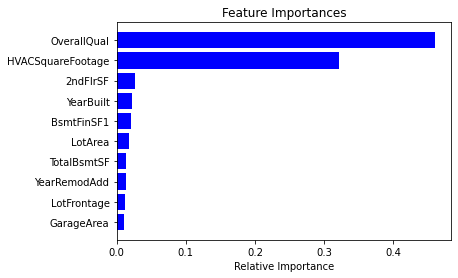

In [134]:
features = X.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Decision Tree Regressor

In [135]:
topTenFeatures = []
for i in indices:
    topTenFeatures.append(features[i])

topX = X[topTenFeatures]

regressor = DecisionTreeRegressor(max_depth=5)

X_train, X_test, y_train, y_test = train_test_split(topX, y, test_size=0.2)

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

score = regressor.score(X_test, y_test)
print(score)

0.7788731550268425


In [136]:
# Fit the regressor, set max_depth = 4
regr = DecisionTreeRegressor(max_depth=4)
model = regr.fit(X_train, y_train)
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_9 <= 0.72
|   |--- feature_8 <= 0.18
|   |   |--- feature_6 <= 0.60
|   |   |   |--- feature_8 <= 0.12
|   |   |   |   |--- value: [88481.73]
|   |   |   |--- feature_8 >  0.12
|   |   |   |   |--- value: [116641.23]
|   |   |--- feature_6 >  0.60
|   |   |   |--- feature_8 <= 0.13
|   |   |   |   |--- value: [120471.53]
|   |   |   |--- feature_8 >  0.13
|   |   |   |   |--- value: [144543.07]
|   |--- feature_8 >  0.18
|   |   |--- feature_9 <= 0.61
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- value: [148451.93]
|   |   |   |--- feature_9 >  0.50
|   |   |   |   |--- value: [177303.45]
|   |   |--- feature_9 >  0.61
|   |   |   |--- feature_8 <= 0.25
|   |   |   |   |--- value: [193504.09]
|   |   |   |--- feature_8 >  0.25
|   |   |   |   |--- value: [251467.93]
|--- feature_9 >  0.72
|   |--- feature_8 <= 0.30
|   |   |--- feature_3 <= 0.26
|   |   |   |--- feature_0 <= 0.37
|   |   |   |   |--- value: [204137.50]
|   |   |   |--- feature_0 >  0.37
|   |   |

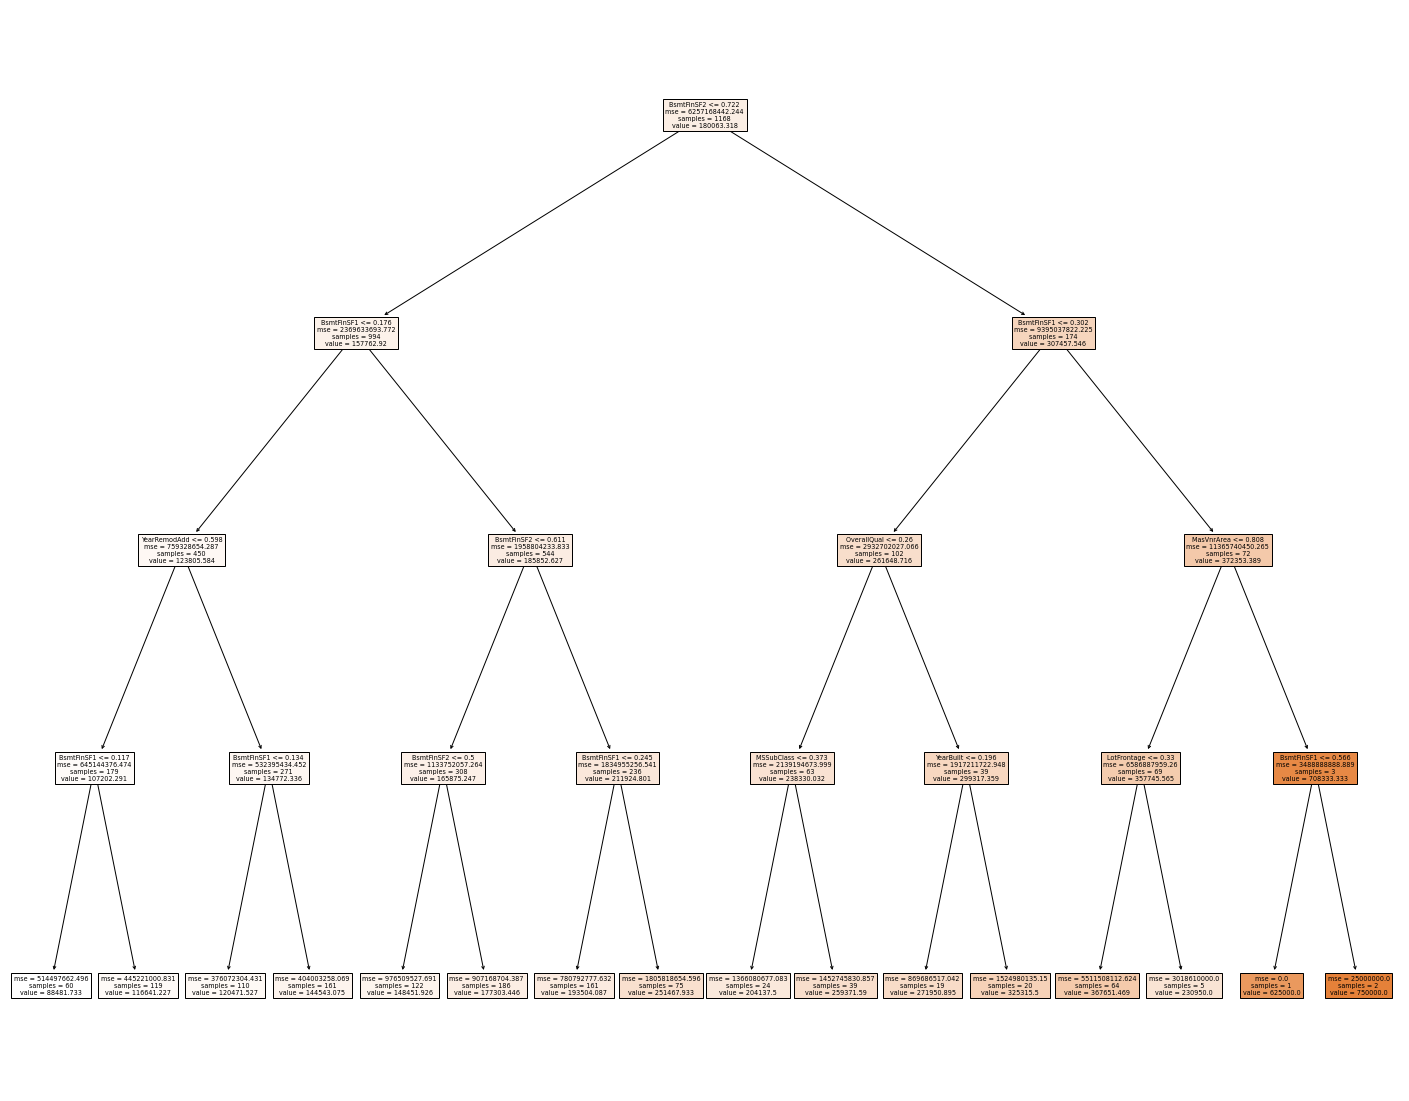

In [137]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=df.columns, filled=True)

#### Garage Area Vs. Predicted Sales Price

In [138]:
X_train.head(1)

,GarageArea,LotFrontage,YearRemodAdd,TotalBsmtSF,LotArea,BsmtFinSF1,YearBuilt,2ndFlrSF,HVACSquareFootage,OverallQual
932,0.555712,0.215753,0.933333,0.311784,0.04847,0.0,0.971014,0.0,0.301746,0.888889


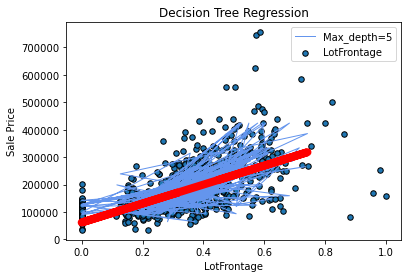

In [139]:
plt.scatter(X_train.iloc[:, 0], 
            y_train,
            s = 30,
            edgecolor='black',
            label = 'LotFrontage')

plt.plot(X_test.iloc[:,0], y_pred, color = 'cornflowerblue', label = "Max_depth=5", linewidth = 1)
from numpy.polynomial.polynomial import polyfit
b,m =polyfit(X_test.iloc[:,0], y_pred, 1)
plt.plot(X_test.iloc[:,0], b + m * X_test.iloc[:,0], '-',linewidth= 8, color='red')
plt.xlabel('LotFrontage')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()


#### Year Built Vs. Predicted Sales Price

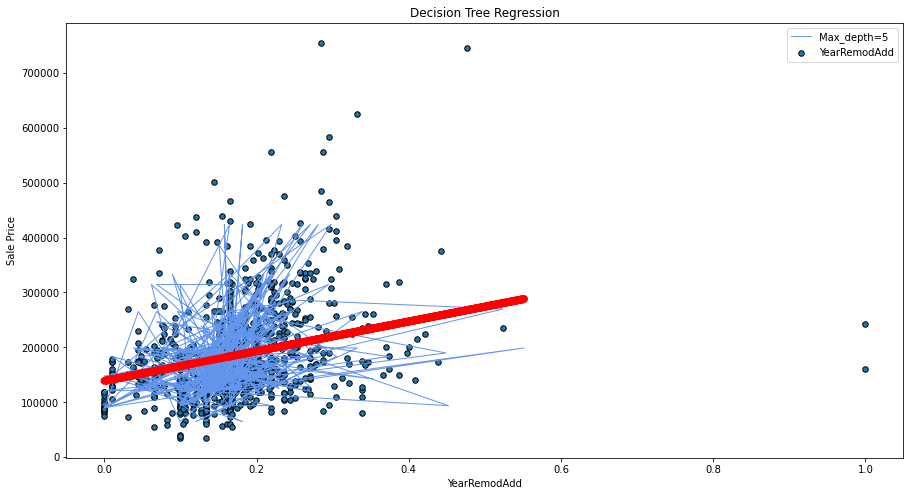

In [140]:
plt.figure(figsize=[15,8])
plt.scatter(X_train.iloc[:, 1], 
            y_train,
            s = 30,
            edgecolor='black',
            label = 'YearRemodAdd')

plt.plot(X_test.iloc[:,1], y_pred, color = 'cornflowerblue', label = "Max_depth=5", linewidth = 1)
from numpy.polynomial.polynomial import polyfit
b,m =polyfit(X_test.iloc[:,1], y_pred, 1)
plt.plot(X_test.iloc[:,1], b + m * X_test.iloc[:,1], '-',linewidth= 8, color='red')
plt.xlabel('YearRemodAdd')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

#### 1stFirSF vs. Predicted Sales Price

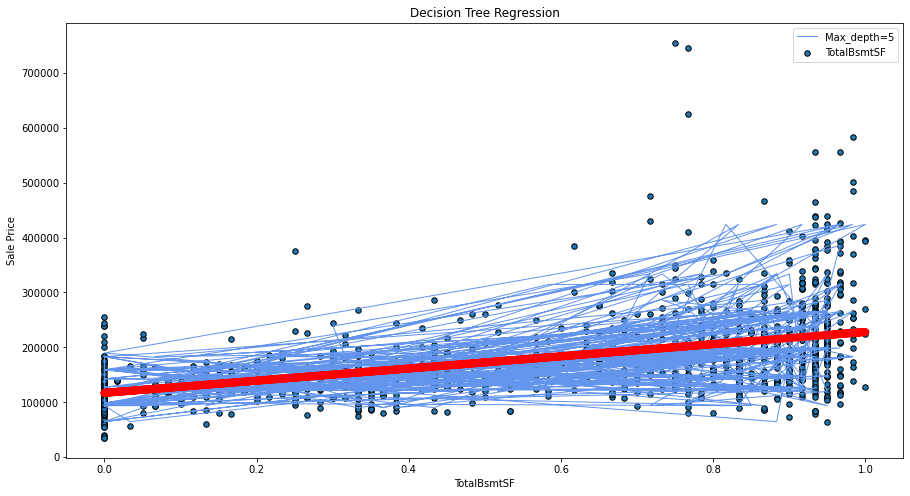

In [141]:
plt.figure(figsize=[15,8])
plt.scatter(X_train.iloc[:, 2], 
            y_train,
            s = 30,
            edgecolor='black',
            label = 'TotalBsmtSF')

plt.plot(X_test.iloc[:,2], y_pred, color = 'cornflowerblue', label = "Max_depth=5", linewidth = 1)
from numpy.polynomial.polynomial import polyfit
b,m =polyfit(X_test.iloc[:,2], y_pred, 1)
plt.plot(X_test.iloc[:,2], b + m * X_test.iloc[:,2], '-',linewidth= 8, color='red')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

#### LotArea vs. Predicted Sales Price

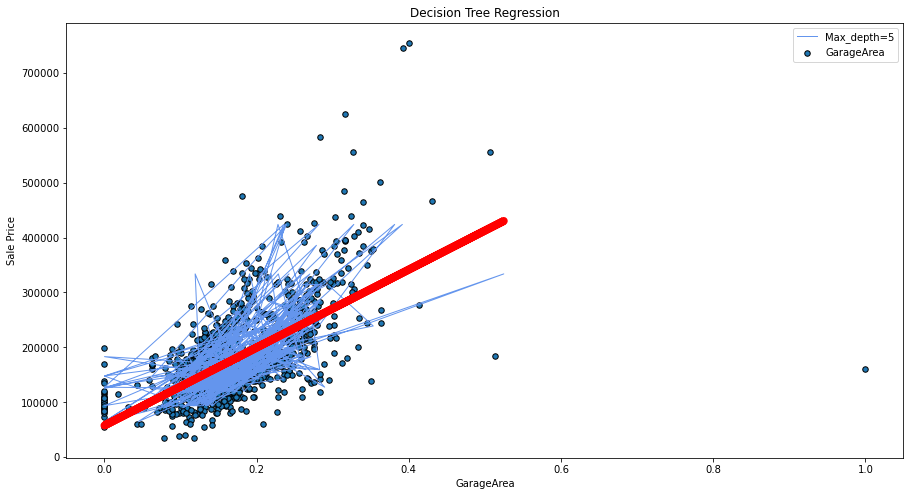

In [142]:
plt.figure(figsize=[15,8])
plt.scatter(X_train.iloc[:, 3], 
            y_train,
            s = 30,
            edgecolor='black',
            label = 'GarageArea')

plt.plot(X_test.iloc[:,3], y_pred, color = 'cornflowerblue', label = "Max_depth=5", linewidth = 1)
from numpy.polynomial.polynomial import polyfit
b,m =polyfit(X_test.iloc[:,3], y_pred, 1)
plt.plot(X_test.iloc[:,3], b + m * X_test.iloc[:,3], '-',linewidth= 8, color='red')
plt.xlabel('GarageArea')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

#### BsmtFinSF1 vs. Predicted Sales Price

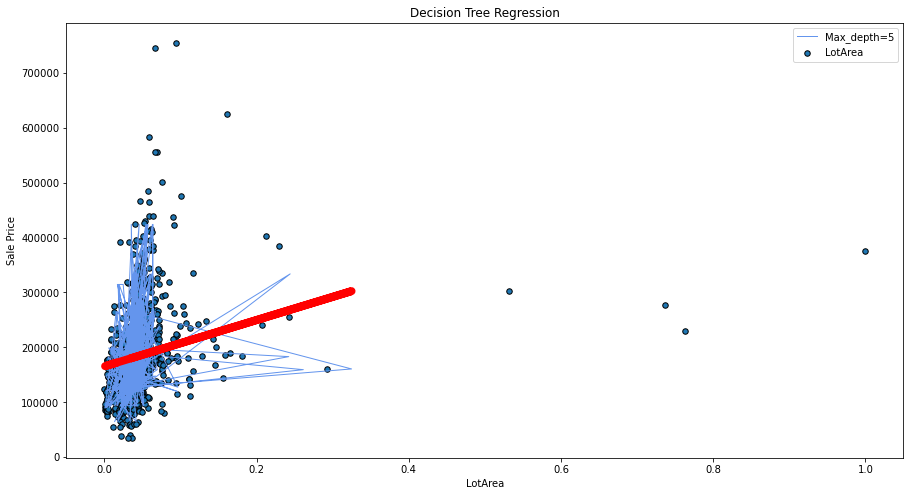

In [143]:
plt.figure(figsize=[15,8])
plt.scatter(X_train.iloc[:, 4], 
            y_train,
            s = 30,
            edgecolor='black',
            label = 'LotArea')

plt.plot(X_test.iloc[:,4], y_pred, color = 'cornflowerblue', label = "Max_depth=5", linewidth = 1)
from numpy.polynomial.polynomial import polyfit
b,m =polyfit(X_test.iloc[:,4], y_pred, 1)
plt.plot(X_test.iloc[:,4], b + m * X_test.iloc[:,4], '-',linewidth= 8, color='red')
plt.xlabel('LotArea')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

#### 2ndFlrSF vs. Predicated Sales Price

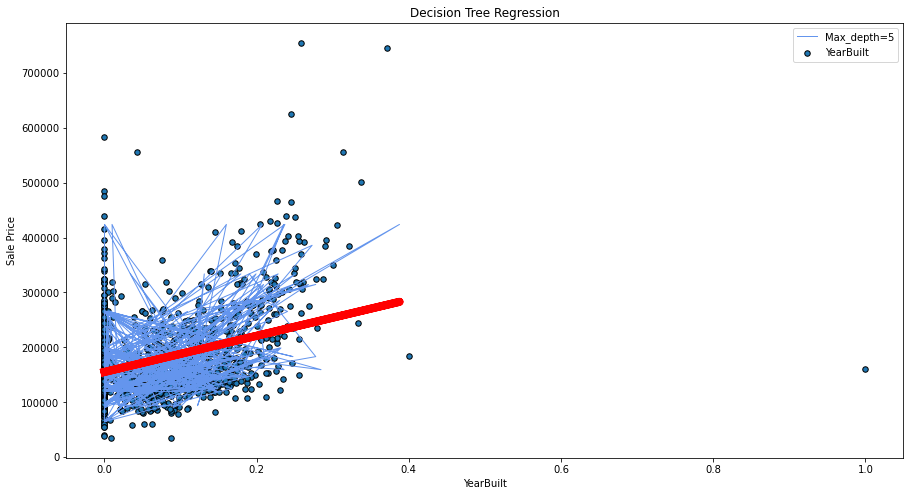

In [144]:
plt.figure(figsize=[15,8])
plt.scatter(X_train.iloc[:, 5], 
            y_train,
            s = 30,
            edgecolor='black',
            label = 'YearBuilt')

plt.plot(X_test.iloc[:,5], y_pred, color = 'cornflowerblue', label = "Max_depth=5", linewidth = 1)
from numpy.polynomial.polynomial import polyfit
b,m =polyfit(X_test.iloc[:,5], y_pred, 1)
plt.plot(X_test.iloc[:,5], b + m * X_test.iloc[:,5], '-',linewidth= 8, color='red')
plt.xlabel('YearBuilt')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

#### TotalBsmtSF vs. Predicted Sales Price

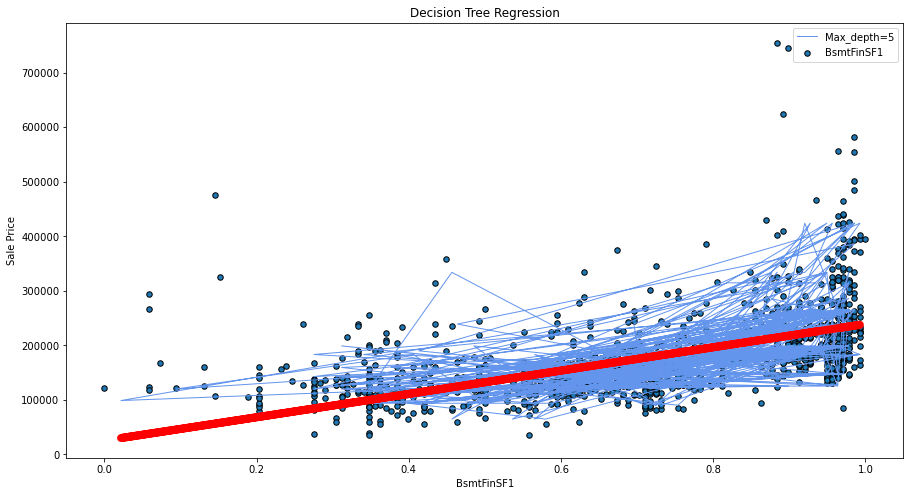

In [145]:
plt.figure(figsize=[15,8])
plt.scatter(X_train.iloc[:, 6], 
            y_train,
            s = 30,
            edgecolor='black',
            label = 'BsmtFinSF1')

plt.plot(X_test.iloc[:,6], y_pred, color = 'cornflowerblue', label = "Max_depth=5", linewidth = 1)
from numpy.polynomial.polynomial import polyfit
b,m =polyfit(X_test.iloc[:,6], y_pred, 1)
plt.plot(X_test.iloc[:,6], b + m * X_test.iloc[:,6], '-',linewidth= 8, color='red')
plt.xlabel('BsmtFinSF1')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

#### GrLivArea vs. Predicated Sale Price

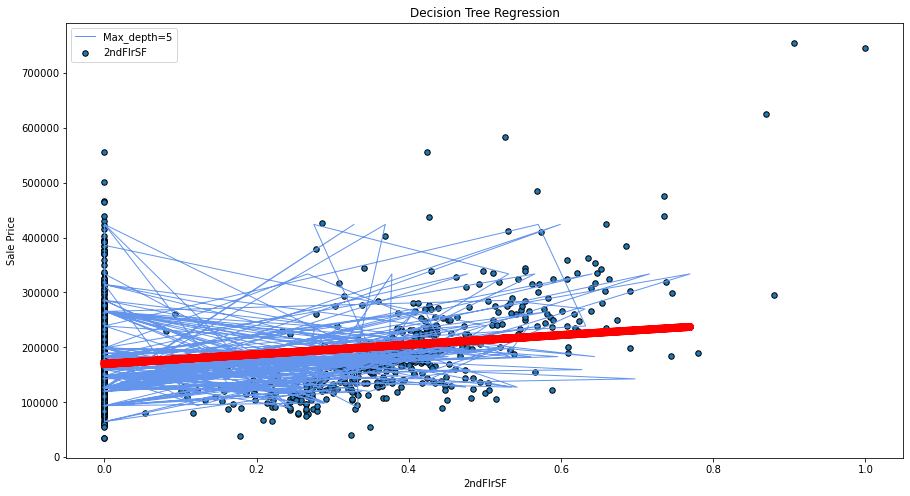

In [146]:
plt.figure(figsize=[15,8])
plt.scatter(X_train.iloc[:, 7], 
            y_train,
            s = 30,
            edgecolor='black',
            label = '2ndFlrSF')

plt.plot(X_test.iloc[:,7], y_pred, color = 'cornflowerblue', label = "Max_depth=5", linewidth = 1)
from numpy.polynomial.polynomial import polyfit
b,m =polyfit(X_test.iloc[:,7], y_pred, 1)
plt.plot(X_test.iloc[:,7], b + m * X_test.iloc[:,7], '-',linewidth= 8, color='red')
plt.xlabel('2ndFlrSF')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

#### OverallQual vs. Predicted Sales Price

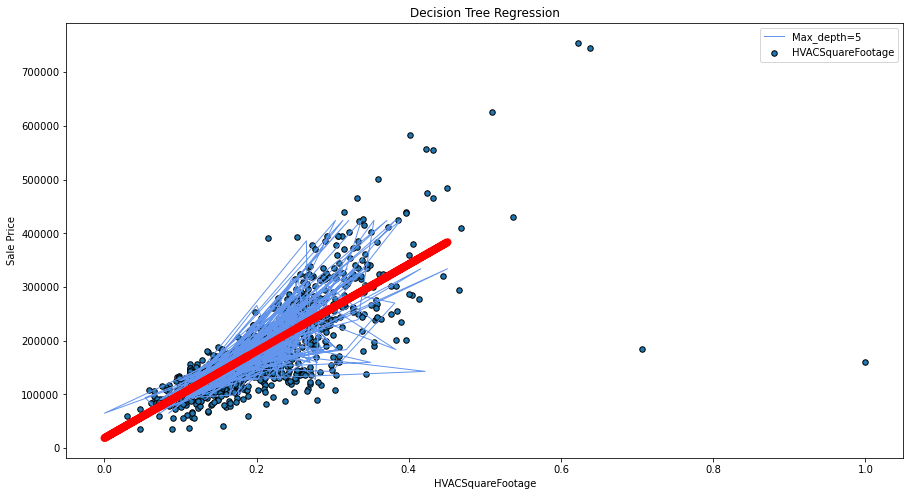

In [147]:
plt.figure(figsize=[15,8])
plt.scatter(X_train.iloc[:, 8], 
            y_train,
            s = 30,
            edgecolor='black',
            label = 'HVACSquareFootage')

plt.plot(X_test.iloc[:,8], y_pred, color = 'cornflowerblue', label = "Max_depth=5", linewidth = 1)
from numpy.polynomial.polynomial import polyfit
b,m =polyfit(X_test.iloc[:,8], y_pred, 1)
plt.plot(X_test.iloc[:,8], b + m * X_test.iloc[:,8], '-',linewidth= 8, color='red')
plt.xlabel('HVACSquareFootage')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

In [148]:
# Mean Absolute Error
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# Mean Squared Error
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

# Root Mean Squared Error (RMSE)
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Root Squared Score (R2)
print("R Squared Score is:", r2_score(y_test, y_pred))

Mean Absolute Error: 26634.713072304865
Mean Squared Error: 1435234855.9829319
Root Mean Squared Error: 37884.49360863798
R Squared Score is: 0.7788731550268425


#### Below is the attempt to improve model by reducing the number of features, going from 10 to 5.

In [149]:
top5X = X[topTenFeatures[:5]]

regressor = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(top5X, y, test_size=0.2)

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

score = regressor.score(X_test, y_test)
print(score)

0.567484383573664


#### But our model deteriorates with this change so 10 features will be employed instead.

## Bootstrap Aggregrating Method to improve accuracy

In [150]:
from sklearn.ensemble import BaggingRegressor
X_train, X_test, y_train, y_test = train_test_split(topX, y, test_size=0.2)
regressor = DecisionTreeRegressor() 
b_regressor = BaggingRegressor(regressor, n_estimators = 100, max_features=3, max_samples=.5)  # get Boostrap aggregation ensemble regressor 

# Fit+predict using regular regressor
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

# Fit predict using bootstrap aggregation
b_regressor.fit(X_train, y_train)  
y_b_pred = b_regressor.predict(X_test) 

df = pd.DataFrame({'Actual Value': y_test, 'Predicted Values': y_pred, 'Bagging Predicted Values': y_b_pred})  
print(df)
print('Score (Regular):', regressor.score(X_test, y_test))
print('Score (Bagging):', b_regressor.score(X_test, y_test))
print('Mean Absolute Error (Regular):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (Regular):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (Regular):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (Bagging):', metrics.mean_absolute_error(y_test, y_b_pred))
print('Mean Squared Error (Bagging):', metrics.mean_squared_error(y_test, y_b_pred))
print('Root Mean Squared Error (Bagging):', np.sqrt(metrics.mean_squared_error(y_test, y_b_pred)))

      Actual Value  Predicted Values  Bagging Predicted Values
359         280000          220000.0             239948.820000
704         213000          210000.0             205097.108333
725         120500          124500.0             126219.707429
1017        187500          254000.0             196943.553333
632          82500          157000.0             183718.196667
...            ...               ...                       ...
644         370878          266000.0             279194.893333
793         225000          212000.0             227100.421583
1202        117000          154900.0             125218.760000
160         162500          167900.0             165503.261765
378         394432          319000.0             354701.742500

[292 rows x 3 columns]
Score (Regular): 0.7485304005527172
Score (Bagging): 0.8201725533931856
Mean Absolute Error (Regular): 29051.513698630137
Mean Squared Error (Regular): 1714741951.630137
Root Mean Squared Error (Regular): 41409.442783381

#### By implementing the Bootstrap aggregating method, we were able to improve the accuracy of the model quite significantly going from 0.80 to 0.85.

# Decision Tree Regression with AdaBoost

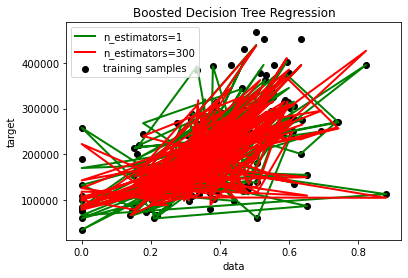

      Actual Value  Predicted Values  Bagging Predicted Values
359         280000          240000.0                  250000.0
704         213000          208500.0                  210000.0
725         120500          112500.0                  124500.0
1017        187500          254000.0                  206300.0
632          82500          157000.0                  185000.0
...            ...               ...                       ...
644         370878          266000.0                  318061.0
793         225000          202900.0                  250000.0
1202        117000          154900.0                  115000.0
160         162500          171500.0                  171500.0
378         394432          374000.0                  372402.0

[292 rows x 3 columns]
Score (Regular): 0.7606873258453912
Score (AdaBoostRegressor): 0.8776339273879923
Mean Absolute Error (Regular): 27633.94178082192
Mean Squared Error (Regular): 1631845291.9623287
Root Mean Squared Error (Regular): 40396

In [151]:
from sklearn.ensemble import AdaBoostRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor()

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(),
                          n_estimators=300, random_state=None)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X_test.iloc[:,0], y_pred, c="k", label="training samples")
plt.plot(X_test.iloc[:,0], y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X_test.iloc[:,0], y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

df = pd.DataFrame({'Actual Value': y_test, 'Predicted Values': y_1, 'Bagging Predicted Values': y_2})  
print(df)
print('Score (Regular):', regr_1.score(X_test, y_test))
print('Score (AdaBoostRegressor):', regr_2.score(X_test, y_test))
print('Mean Absolute Error (Regular):', metrics.mean_absolute_error(y_test, y_1))
print('Mean Squared Error (Regular):', metrics.mean_squared_error(y_test, y_1))
print('Root Mean Squared Error (Regular):', np.sqrt(metrics.mean_squared_error(y_test, y_1)))

print('Mean Absolute Error (AdaBoostRegressor):', metrics.mean_absolute_error(y_test, y_2))
print('Mean Squared Error (AdaBoostRegressor):', metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared Error (AdaBoostRegressor):', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

# Generating new features with PCA and checking for improvement in the model

In [152]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(topX)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.410674,0.172130,0.005146,-0.130624,0.023739,0.021997,-0.046108,0.049913,0.001516,-0.005640
1,-0.124819,-0.160361,0.121163,0.015284,-0.037528,0.058136,-0.017737,0.039278,-0.014016,-0.004719
2,0.400877,0.189767,0.025352,-0.102005,0.050818,-0.000559,-0.018501,0.024177,0.010525,-0.007293
3,-0.306974,0.323494,-0.026016,0.259886,0.006794,-0.157417,-0.046814,0.046089,0.008098,-0.006815
4,0.455442,0.318004,0.174339,0.018529,0.067292,-0.015087,-0.010217,0.039826,0.008110,-0.007812


In [153]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.56156794, 0.16703696, 0.11985009, 0.06165282, 0.03331163,
       0.02364118, 0.01602132, 0.00948817, 0.00623126, 0.00119864])

In [154]:
np.cumsum(pca.explained_variance_ratio_)

array([0.56156794, 0.72860489, 0.84845498, 0.9101078 , 0.94341943,
       0.96706061, 0.98308193, 0.99257011, 0.99880136, 1.        ])

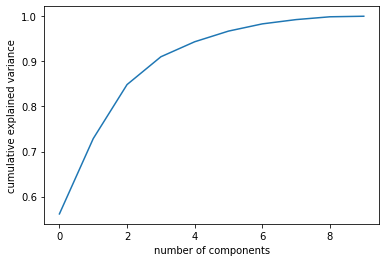

In [155]:
plt.plot( np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [156]:
topXP = topX # top 10 features
regressor = DecisionTreeRegressor(max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(topXP, y, test_size=0.2)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
print("Num of PCA components, score")
print("0,    ",score)

for j in range(0,10):
    
    x_pca1 = x_pca[j]
    topXP = pd.concat([topXP, x_pca1], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(topXP, y, test_size=0.2,random_state=0)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    score = regressor.score(X_test, y_test)
    print(j+1,",    ",score)

Num of PCA components, score
0,     0.7965196633165496
1 ,     0.8386699684667215
2 ,     0.8121211680470833
3 ,     0.8118594150112811
4 ,     0.8427246631957637
5 ,     0.845499681795667
6 ,     0.829235302678166
7 ,     0.8358474186007019
8 ,     0.8401638663655462
9 ,     0.8358474186007019
10 ,     0.8358474186007019


#### As illustrated above, the data set under PCA, using 3 components, gives us it's maximum performance. Thus we can finalize the data according to the top 10 features obtained from Random Forest Regressor and the first 3 PCA components.

In [157]:
df_num = pd.concat([df_num,x_pca.iloc[:,:4]],axis=1)
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MoSold,YrSold,SalePrice,HVACSquareFootage,Tonnage,VehicleRatio,0,1,2,3
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,2008,208500,4276,5.0,0.364964,0.410674,0.172130,0.005146,-0.130624
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,5,2007,181500,3786,5.0,0.434783,-0.124819,-0.160361,0.121163,0.015284
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,9,2008,223500,4492,5.0,0.328947,0.400877,0.189767,0.025352,-0.102005
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2,2006,140000,4190,5.0,0.467290,-0.306974,0.323494,-0.026016,0.259886
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,12,2008,250000,5541,5.0,0.358852,0.455442,0.318004,0.174339,0.018529


In [158]:
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MoSold,YrSold,SalePrice,HVACSquareFootage,Tonnage,VehicleRatio,0,1,2,3
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,2008,208500,4276,5.0,0.364964,0.410674,0.172130,0.005146,-0.130624
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,5,2007,181500,3786,5.0,0.434783,-0.124819,-0.160361,0.121163,0.015284
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,9,2008,223500,4492,5.0,0.328947,0.400877,0.189767,0.025352,-0.102005
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2,2006,140000,4190,5.0,0.467290,-0.306974,0.323494,-0.026016,0.259886
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,12,2008,250000,5541,5.0,0.358852,0.455442,0.318004,0.174339,0.018529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,8,2007,175000,4247,5.0,0.434783,0.300911,0.094154,-0.062873,-0.173295
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,2,2010,210000,5688,5.0,0.400000,0.064950,-0.163380,0.058972,0.078932
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,5,2010,266500,5832,5.0,0.396825,0.246054,0.394078,-0.353637,0.074205
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,4,2010,142125,3234,5.0,0.416667,-0.005204,-0.183736,-0.308497,0.040113


# SVR

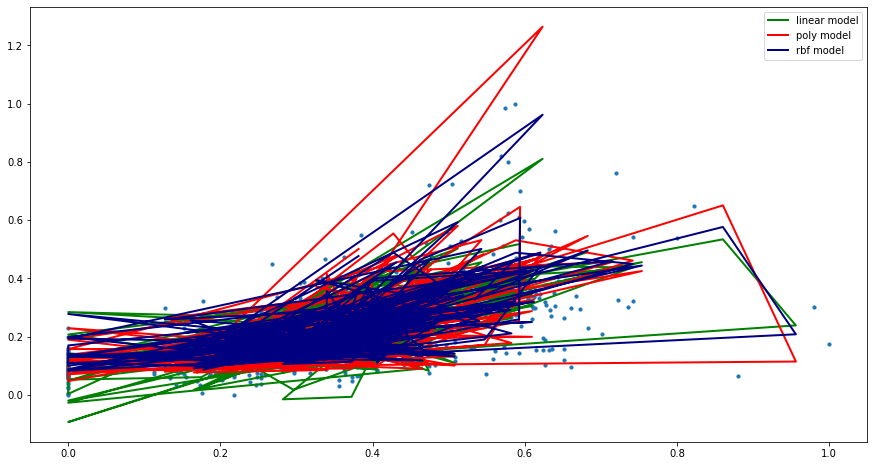

In [159]:
from sklearn.svm import SVR

# Normalize the dataset
x = df_num.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df_num.columns)
X = df.drop(columns='SalePrice')
y = df['SalePrice']
y.head()

topX = X[topTenFeatures]

X_train, X_test, y_train, y_test = train_test_split(topX, y, test_size=0.2)

svrs = [SVR(kernel='linear', gamma='scale'), SVR(kernel='poly', gamma='scale'), SVR(kernel='rbf', gamma='scale')]
for model in svrs:
    model.fit(X_train,y_train)

lw = 2
plt.figure(figsize=[15,8])

plt.scatter(X_train.iloc[:,0], y_train,s=10)

plt.plot(X_test.iloc[:,0], svrs[0].predict(X_test), color='green', lw=lw, label='linear model')
plt.plot(X_test.iloc[:,0], svrs[1].predict(X_test), color='red', lw=lw, label='poly model')
plt.plot(X_test.iloc[:,0], svrs[2].predict(X_test), color='navy', lw=lw, label='rbf model')
plt.legend()

In [160]:
print('Score (Linear):', svrs[0].score(X_test, y_test))
print('Score (Poly):', svrs[1].score(X_test, y_test))
print('Score (RBF):', svrs[2].score(X_test, y_test))

Score (Linear): 0.5923097850593306
Score (Poly): 0.41239303593166177
Score (RBF): 0.6275255966129663


# Linear Regression

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X[topTenFeatures],df['SalePrice'], test_size=0.2, random_state=0)

In [162]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [163]:
cols = X_train.columns.to_list()
coeff_df = pd.DataFrame(regressor.coef_, cols, columns=['Coefficient'])  
coeff_df

,Coefficient
GarageArea,0.074821
LotFrontage,0.074292
YearRemodAdd,0.029189
TotalBsmtSF,-0.054256
LotArea,0.150932
BsmtFinSF1,0.195544
YearBuilt,0.037830
2ndFlrSF,-0.009767
HVACSquareFootage,0.634920
OverallQual,0.236572


In [164]:
y_pred = regressor.predict(X_test)

In [165]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
529,0.230140,0.340889
491,0.136231,0.159578
459,0.104291,0.100408
279,0.218164,0.266690
655,0.073740,0.100238


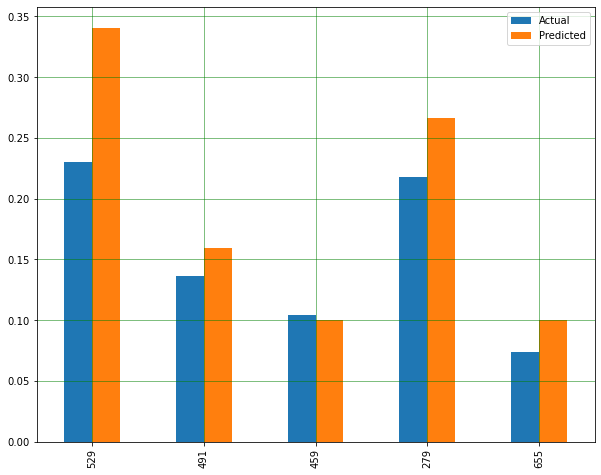

In [166]:

df.head().plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [167]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))
print('Score:', regressor.score(X_test, y_test))

Mean Absolute Error: 0.03457301394580422
Mean Squared Error: 0.005310136961649095
Root Mean Squared Error: 0.07287068657319687
R-squared Error: 0.6012743213224381
Score: 0.6012743213224381


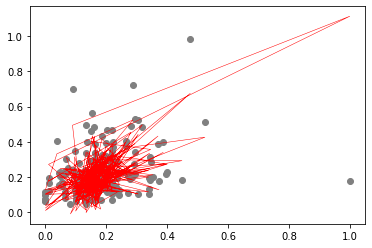

In [168]:
plt.scatter(X_test.iloc[:,1], y_test,  color='gray')
plt.plot(X_test.iloc[:,1], y_pred, color='red', linewidth=0.5)
plt.show()

#### Recursive feature elimination

In [169]:
from sklearn.feature_selection import RFE
selector = RFE(regressor, n_features_to_select=2, step=1)

selector.fit(X_train, y_train)

passedParameters = list(selector.support_)

allColumns        = X_train.columns.to_list()

def AccepetableColumns (passedParameters, allColumns):
    
    recFeatSelect     = []

    for i, j in zip(passedParameters,allColumns):

        if i == True:
            recFeatSelect.append(j)
            
    return recFeatSelect
results = AccepetableColumns(passedParameters, allColumns)
print(results)

ranking = pd.DataFrame({'columns': allColumns, 'ranking': selector.ranking_})
ranking.head()

['HVACSquareFootage', 'OverallQual']


,columns,ranking
0,GarageArea,4
1,LotFrontage,5
2,YearRemodAdd,7
3,TotalBsmtSF,8
4,LotArea,3


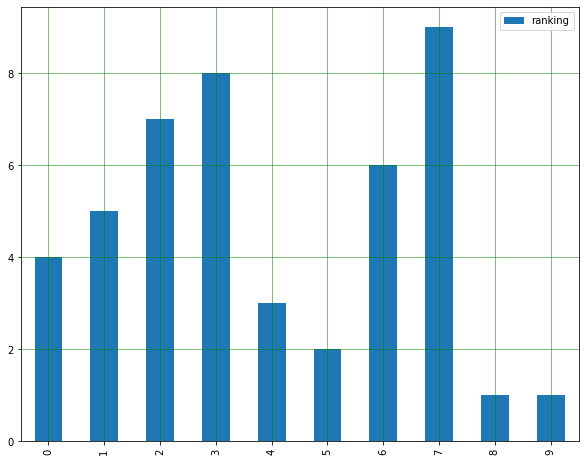

In [170]:
ranking.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [171]:
regressor = LinearRegression()  
regressor.fit(X_train[results], y_train)
y_pred = regressor.predict(X_test[results])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))
print('Score:', regressor.score(X_test[results], y_test))

Mean Absolute Error: 0.038590466184420434
Mean Squared Error: 0.004776374486581526
Root Mean Squared Error: 0.06911131952568643
R-squared Error: 0.6413532885244135
Score: 0.6413532885244135


In [172]:
score = []
rSquaredError = []
rootMeanSquaredError = []
meanSquaredError = []
meanAbsoluteError = []

for i in range(1,10):
    
    selector = RFE(regressor, n_features_to_select=i, step=1)

    selector.fit(X_train, y_train)

    passedParameters = list(selector.support_)

    allColumns        = X_train.columns.to_list()
    
    results = AccepetableColumns(passedParameters, allColumns)
    regressor = LinearRegression()  
    regressor.fit(X_train[results], y_train)
    y_pred = regressor.predict(X_test[results])
    
    score.append(regressor.score(X_test[results], y_test))
    rSquaredError.append(metrics.r2_score(y_test, y_pred))
    rootMeanSquaredError.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    meanSquaredError.append(metrics.mean_squared_error(y_test, y_pred))
    meanAbsoluteError.append(metrics.mean_squared_error(y_test, y_pred))

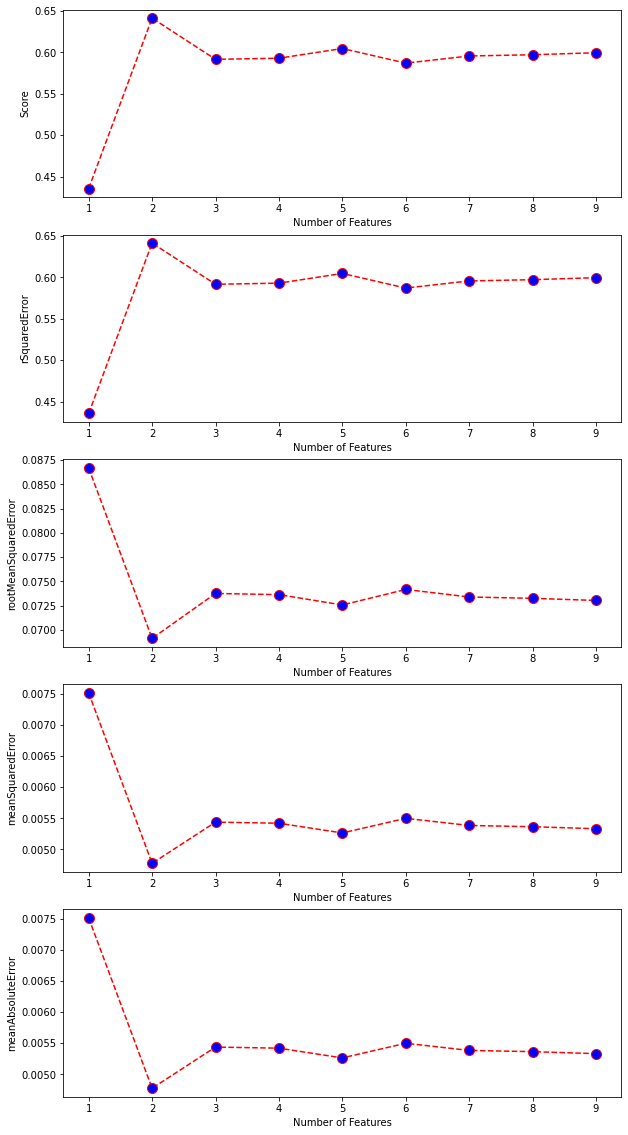

In [173]:
figure, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,20))

axes[0].plot(range(1, 10), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Number of Features')
plt.ylabel('Score')

axes[1].plot(range(1, 10), rSquaredError, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Number of Features')
plt.ylabel('rSquaredError')

axes[2].plot(range(1, 10), rootMeanSquaredError, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Number of Features')
plt.ylabel('rootMeanSquaredError')
axes[3].plot(range(1, 10), meanSquaredError, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Number of Features')
plt.ylabel('meanSquaredError')

axes[4].plot(range(1, 10), meanAbsoluteError, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Number of Features')
plt.ylabel('meanAbsoluteError')

axes.flat[0].set(xlabel='Number of Features', ylabel='Score')
axes.flat[1].set(xlabel='Number of Features', ylabel='rSquaredError')
axes.flat[2].set(xlabel='Number of Features', ylabel='rootMeanSquaredError')
axes.flat[3].set(xlabel='Number of Features', ylabel='meanSquaredError')
axes.flat[4].set(xlabel='Number of Features', ylabel='meanAbsoluteError')
plt.show()

In [174]:
df_object = housePricesData.select_dtypes(include=[np.object])
df_object.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
